**Task 1 - numpy.random vs random**


Замерьте время вычисления чисел от 0 до 1 из равномерного распределения с помощью модуля random и модуля numpy, изобразите зависимость времени вычисления от количества вычисляемых чисел для них. Другими словами - по x идёт то, сколько чисел за прогон вы взяли от 0 до 1, а по y - время, которое это заняло. И сравните время выполнения в numpy и в random)

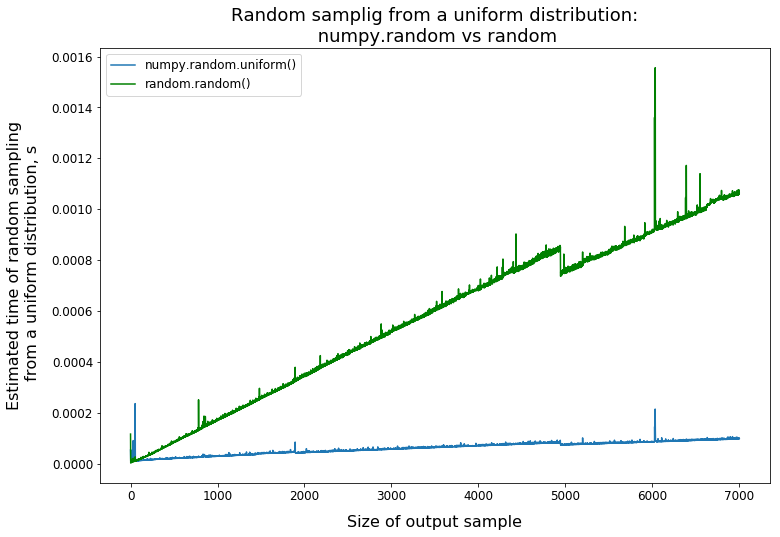

In [2]:
import numpy as np
import time
import random
import matplotlib.pyplot as plt


dict_size_time = {}
for size_number in range(0, 7000):
    start = time.time()
    # sample number from uniform distribution using numpy
    numpy_code = np.random.uniform(size=size_number)
    end = time.time()
    
    # estimate time for "numpy" case, for certain size_number
    time_numpy = end - start

    start = time.time()
    # sample number from uniform distribution using random
    random_code = [random.random() for x in range(size_number)]
    end = time.time()
    
    # estimate time for "random" case, for certain size_number
    time_random =end - start
    
    # save result as a dictionary
    dict_size_time[size_number] = [time_numpy, time_random]


plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['axes.labelpad'] = 12 
plt.title('Random samplig from a uniform distribution:\n numpy.random vs random', fontsize=18)
plt.ylabel('Estimated time of random sampling\n from a uniform distribution, s', fontsize=16)
plt.xlabel('Size of output sample', fontsize=16)

x = list(dict_size_time.keys())
y_numpy = [dict_size_time[k][0] for k in x]
y_random = [dict_size_time[k][1] for k in x]
plt.plot(x,y_numpy, label= 'numpy.random.uniform()')
plt.plot(x,y_random, label = 'random.random()', c = 'g')
plt.legend()
plt.show()

**Task 2 - Bogosort**

Сделайте функцию для проверки является ли список отсортированным (без использования sorted или sort). Затем реализуйте monkey sort (https://en.wikipedia.org/wiki/Bogosort), а потом визуализируйте следующее: распределение времени работы алгоритма от размера сортируемого списка. То есть по x идёт размер массива, а по y - среднее время нескольких прогонов и их отклонение (или дисперсия)

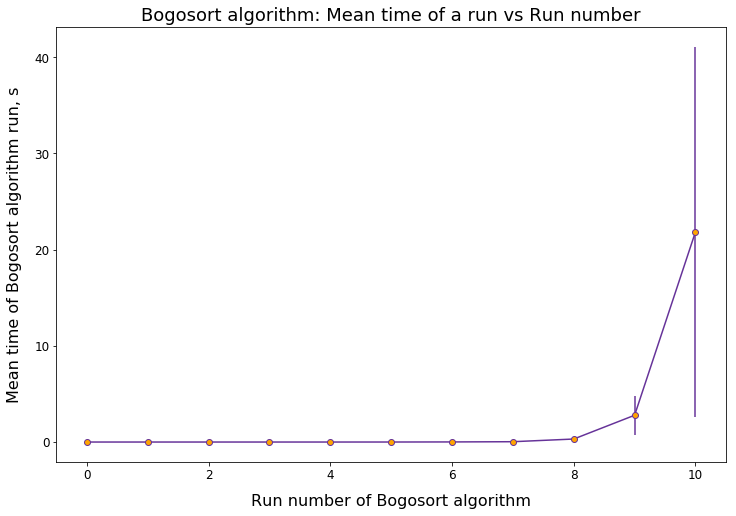

In [11]:
import numpy as np
import time
import matplotlib.pyplot as plt

def is_sorted(arr):
    for i in range(1, len(arr)):
        if arr[i-1] <= arr[i]:
            return False
    return True

def bogo_sort(arr): 
    while (is_sorted(arr)== False): 
        np.random.shuffle(arr)


dict_size_times = {}
for size_array in range(11):
    for run_number in range(11):
        arr = np.random.sample(size_array)
        start_time = time.time()
        bogo_sort(arr)
        end_time = time.time()
        if size_array not in dict_size_times:
            dict_size_times[size_array] = [end_time - start_time]
        else:
            dict_size_times[size_array].append(end_time - start_time)


plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['axes.labelpad'] = 12 
plt.title('Bogosort algorithm: Mean time of a run vs Run number', fontsize=18)
plt.ylabel('Mean time of Bogosort algorithm run, s', fontsize=16)
plt.xlabel('Run number of Bogosort algorithm', fontsize=16)

plt.errorbar(list(dict_size_times.keys()),
             [np.mean(dict_size_times[i]) for i in dict_size_times], 
             [np.std(dict_size_times[i]) for i in dict_size_times], 
             marker='.',
             markersize=12,
             markerfacecolor = 'orange',
            c = 'rebeccapurple')

plt.show()

**Task 3 - Random walk 2D**

Визуализируйте random walk (случайная прогулка, да)) в 2-мерном пространстве, где вы начинаете в (0, 0) и можете перемещаться вверх, вниз, вправо и влево. Как визуализировать - скаттерплот, где по x - x, а по y - y

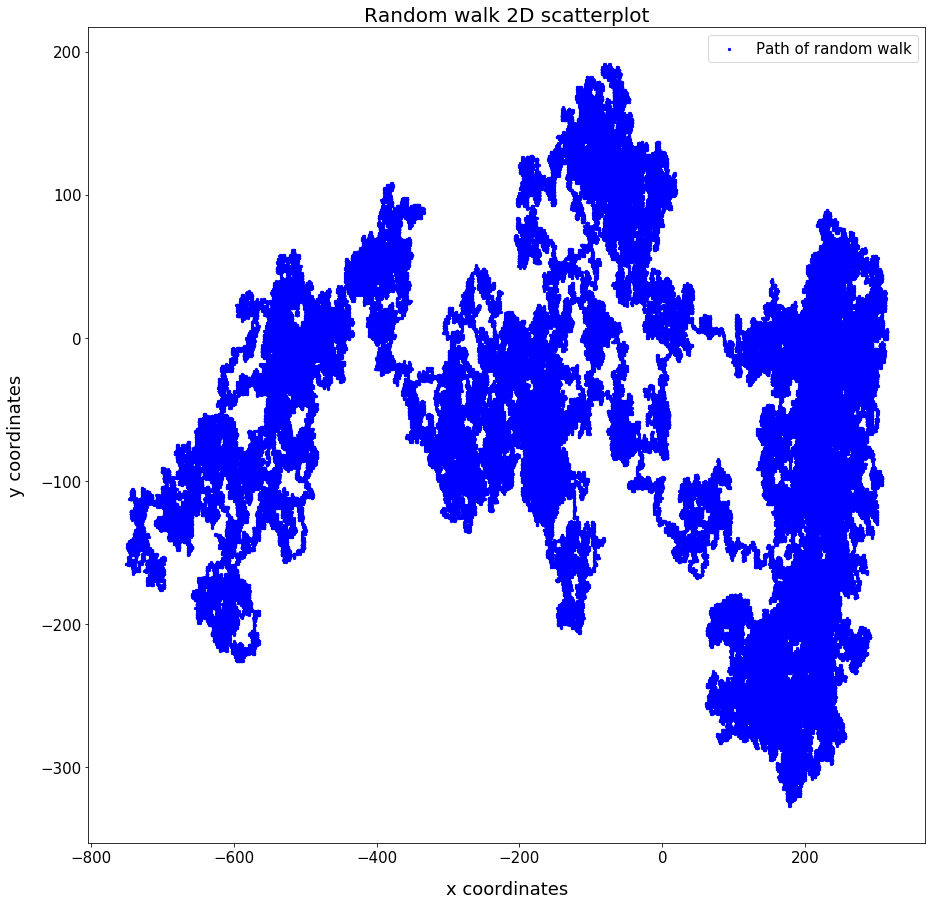

In [4]:
import numpy as np 
import matplotlib.pyplot as plt

number_steps = 700000

# arrays to store x and y coordinates: 
x_coordinates = np.zeros(number_steps) 
y_coordinates = np.zeros(number_steps)

# specify 4 directions of walking:
directions = ['up', 'down', 'left', 'right']

for step in range(1, number_steps):
    curr_direction = np.random.choice(directions)
    if curr_direction == 'up': 
        x_coordinates[step] = x_coordinates[step - 1] 
        y_coordinates[step] = y_coordinates[step - 1] + 1
    elif curr_direction == 'left': 
        x_coordinates[step] = x_coordinates[step - 1] - 1
        y_coordinates[step] = y_coordinates[step - 1] 
    elif curr_direction == 'right':
        x_coordinates[step] = x_coordinates[step - 1] + 1
        y_coordinates[step] = y_coordinates[step - 1] 
    else: 
        x_coordinates[step] = x_coordinates[step - 1] 
        y_coordinates[step] = y_coordinates[step - 1] - 1
        
plt.figure(figsize=(15, 15))
plt.rcParams['font.size'] = 15
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['axes.labelpad'] = 15 
plt.title('Random walk 2D scatterplot', fontsize=20)
plt.ylabel('y coordinates', fontsize=18)
plt.xlabel('x coordinates', fontsize=18)
        
plt.scatter(x_coordinates, y_coordinates, s = 5, c = 'blue', label = 'Path of random walk')
plt.legend()

**Task 4 - Sierpiński triangle**

Сгенерируйте и нарисуйте треугольник Серпинского (https://en.wikipedia.org/wiki/Sierpi%C5%84ski_triangle); hint (https://www.youtube.com/watch?v=8ZSlT70pU7A&feature=emb_logo) 

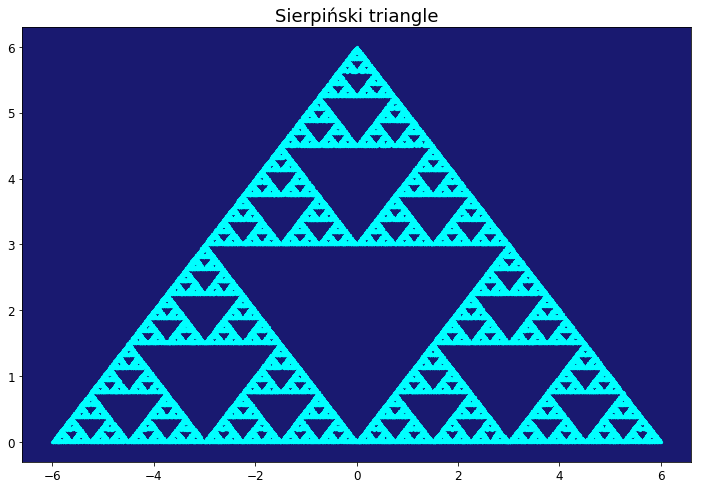

In [7]:
import numpy as np 
import matplotlib.pyplot as plt

# list of initial coordinates (vertices)
x = [-6.0, 0.0, 6.0]
y = [0.0, 6.0, 0.0]

curr_x = np.random.randint(-6,7)
curr_y = np.random.randint(7)
for i in range(0, 70000):
    random_value = np.random.randint(3)
    if random_value == 0:
        curr_x = (curr_x + x[0]) / 2
        curr_y = (curr_y + y[0]) / 2
    elif random_value == 1:
        curr_x = (curr_x + x[1]) / 2
        curr_y = (curr_y + y[1]) / 2
    elif random_value == 2:
        curr_x = (curr_x + x[2]) / 2
        curr_y = (curr_y + y[2]) / 2
    x.append(curr_x)
    y.append(curr_y)
        

plt.figure(figsize=(12, 8))
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['axes.labelpad'] = 12 
plt.title('Sierpiński triangle', fontsize=18)
        
plt.scatter(x, y, s = 5, c = 'cyan')
ax = plt.gca()
ax.set_facecolor('midnightblue')

**Task 5 - Sierpiński carpet**

Сгенерируйте и нарисуйте коврик Серпинского (https://en.wikipedia.org/wiki/Sierpinski_carpet)

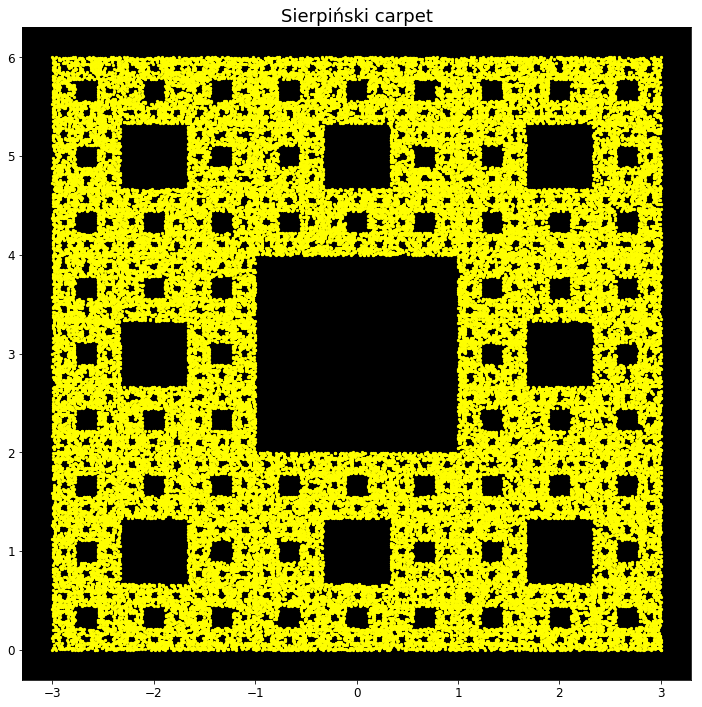

In [9]:
# list of initial coordinates (vertices and midpoints of edges)
x = [-3.0, -3.0, -3.0, 0.0, 0.0, 3.0, 3.0, 3.0]
y = [0.0, 3.0, 6.0, 0.0, 6.0, 0.0, 3.0, 6.0]

curr_x = np.random.randint(-3,4)
curr_y = np.random.randint(7)
for i in range(0, 70000):
    random_value = np.random.randint(8)
    if random_value == 0:
        curr_x = (curr_x + 2 * x[0]) / 3.0
        curr_y = (curr_y + 2 * y[0]) / 3.0
    elif random_value == 1:
        curr_x = (curr_x + 2 * x[1]) / 3.0
        curr_y = (curr_y + 2 * y[1]) / 3.0
    elif random_value == 2:
        curr_x = (curr_x + 2 * x[2]) / 3.0
        curr_y = (curr_y + 2 * y[2]) / 3.0
    elif random_value == 3:
        curr_x = (curr_x + 2 * x[3]) / 3.0
        curr_y = (curr_y + 2 * y[3]) / 3.0
    elif random_value == 4:
        curr_x = (curr_x + 2 * x[4]) / 3.0
        curr_y = (curr_y + 2 * y[4]) / 3.0
    elif random_value == 5:
        curr_x = (curr_x + 2 * x[5]) / 3.0
        curr_y = (curr_y + 2 * y[5]) / 3.0
    elif random_value == 6:
        curr_x = (curr_x + 2 * x[6]) / 3.0
        curr_y = (curr_y + 2 * y[6]) / 3.0
    elif random_value == 7:
        curr_x = (curr_x + 2 * x[7]) / 3.0
        curr_y = (curr_y + 2 * y[7]) / 3.0
    x.append(curr_x)
    y.append(curr_y)
        

plt.figure(figsize=(12, 12))
plt.rcParams['font.size'] = 12
plt.rcParams['savefig.bbox'] = 'tight'
plt.rcParams['axes.labelpad'] = 12 
plt.title('Sierpiński carpet', fontsize=18)
        
plt.scatter(x, y, s = 5, c = 'yellow')
ax = plt.gca()
ax.set_facecolor('black')

**Task 6 - Shuffling letters in the words**

Сделайте программу, получающую на вход текст, и выдающую этот же текст со следующими изменениями - буквы во всех словах кроме первой и последней перемешаны. Для простоты пока будем считать, что пунктуации нет. Пример: "По рзеузльаттам илссоевадний одонго анлигсйокго унвиертисета, не иеемт занчнеия, в каокм проякде рсапжоолены бкувы в солве. Галовне, чотбы преавя и пслонедяя бквуы блыи на мсете. осатьлыне бкувы мгоут селдовтаь в плоонм бсепордяке, все-рвано ткест чтаитсея без побрелм. Пичрионй эгото ялвятеся то, что мы не чиаетм кдаужю бкуву по отдльенотси, а все солво цлиеком."

In [10]:
import numpy as np


def shuffle_inner_letters(input_text):
    """
    Shuffle all letters within each word of input text except for the first and the last letters
    :param input_text: input text (type: str) to shuffle letters within its words
    :return: text () that differs from input text by shuffled letters within each word 
    (except for the first and the last letters)
    """
    output_words = []
    for word in input_text.split():
        if word.endswith(',') or word.endswith('.'):
            output_words.append(word[0]+''.join(np.random.permutation(list(word[1:-2]))) + word[-2:])
        elif len(word) == 1:
            output_words.append(word)
        else:
            output_words.append(word[0]+''.join(np.random.permutation(list(word[1:-1]))) + word[-1:])
    return ' '.join(output_words)

input_text = "По рзеузльаттам илссоевадний одонго анлигсйокго унвиертисета, не иеемт занчнеия, в каокм проякде рсапжоолены бкувы в солве. Галовне, чотбы преавя и пслонедяя бквуы блыи на мсете. осатьлыне бкувы мгоут селдовтаь в плоонм бсепордяке, все-рвано ткест чтаитсея без побрелм. Пичрионй эгото ялвятеся то, что мы не чиаетм кдаужю бкуву по отдльенотси, а все солво цлиеком."
shuffle_inner_letters(input_text)

'По ралуттзеьазм инеодвслсаий огндоо айкиснглого уевинитетсра, не иеемт зечиання, в каокм пяодрке рооаспнжелы бвукы в свлое. Гвнолае, чтбоы пверая и пслендояя бквуы блыи на месте. оьныалсте бвукы могут соетдавль в пнлоом бяесодркпе, ввеса-нро тескт чсиетатя без прлеобм. Пинроичй этгоо ялвстеяя то, что мы не чиетам кждуаю бувку по одттлсньоеи, а все свлоо цклиоем.'